In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, classification_report
import pickle
import os
import glob
import seaborn as sns
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn import preprocessing
from sklearn.utils import class_weight
from sklearn.model_selection import cross_val_score,StratifiedKFold
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [4]:
pip install xgboost==0.90

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [6]:
pd.read_excel

<function pandas.io.excel._base.read_excel(io, sheet_name: 'str | int | list[IntStrT] | None' = 0, header: 'int | Sequence[int] | None' = 0, names=None, index_col: 'int | Sequence[int] | None' = None, usecols=None, squeeze: 'bool | None' = None, dtype: 'DtypeArg | None' = None, engine: "Literal['xlrd', 'openpyxl', 'odf', 'pyxlsb'] | None" = None, converters=None, true_values: 'Iterable[Hashable] | None' = None, false_values: 'Iterable[Hashable] | None' = None, skiprows: 'Sequence[int] | int | Callable[[int], object] | None' = None, nrows: 'int | None' = None, na_values=None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbose: 'bool' = False, parse_dates=False, date_parser=None, thousands: 'str | None' = None, decimal: 'str' = '.', comment: 'str | None' = None, skipfooter: 'int' = 0, convert_float: 'bool | None' = None, mangle_dupe_cols: 'bool' = True, storage_options: 'StorageOptions' = None) -> 'DataFrame | dict[IntStrT, DataFrame]'>

In [3]:
i = 1
frames = []
for name in os.listdir('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/client_data'):
    extents = os.path.splitext('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/client_data'+'/{}'.format(name))[1].lower()
    if extents == '.csv':
        df= pd.read_csv('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/client_data/{}'.format(name))
        frames.append(df)
        print('csv',df.shape)
    elif extents == '.xlsx':
        df= pd.read_excel('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/client_data/{}'.format(name))
        df.columns = df.columns.astype(str)
        frames.append(df)
        print('xlx',df.shape)

result =  pd.concat(frames, axis=0, ignore_index= True)

csv (24, 1060)
csv (16, 1060)
csv (72, 1060)
csv (48, 1060)
csv (78, 1060)
csv (191, 1060)
csv (132, 1059)
csv (224, 1060)
csv (18, 1060)
csv (42, 1060)
csv (142, 1060)
csv (154, 1060)
csv (186, 1060)
csv (29, 1060)
csv (120, 1060)
csv (80, 1060)
csv (28, 1060)
csv (348, 1060)
csv (102, 1060)
csv (180, 1060)
csv (198, 1060)
csv (222, 1060)
csv (77, 1060)
csv (110, 1060)
csv (10, 1060)
csv (254, 1060)
xlx (680, 1059)
csv (210, 1060)
csv (250, 1060)
xlx (224, 1059)
csv (92, 1060)
csv (80, 1060)
csv (240, 1060)
csv (322, 1060)


In [4]:
result.head()

,,L*,a*,b*,X,Y,Z,Dominant Wavelenght,Whiteness,Purity,...,979.335,980.054,980.772,981.491,982.209,982.928,983.646,984.364,985.082,Unnamed: 1059
0,W_Calibration,100.000,0.000000,0.00000,95.0422,100.000,108.8760,565.016,99.9909,0.000017,...,100.0000,100.0000,100.0000,100.0000,100.0000,100.000,100.000,100.0,0.0000,NaN
1,F_Calibration,100.000,0.000000,0.00000,108.1040,100.000,39.2965,491.070,99.9909,0.000170,...,100.0000,100.0000,100.0000,100.0000,100.0000,100.000,100.000,100.0,100.0000,NaN
2,W_3490A2/143_K_Faint_0.501_VS2,126.073,-2.155890,6.26670,172.7770,183.723,185.0670,570.723,161.3150,0.046272,...,194.7650,195.0150,194.5450,194.8950,195.2150,87.500,12.500,75.0,0.0000,NaN
3,F_3490A2/143_K_Faint_0.501_VS2,101.668,8.011290,-51.30560,118.2650,104.375,80.6664,460.157,286.1390,0.160594,...,48.1003,47.2197,46.7071,46.3795,46.3823,367.241,284.483,-30.0,67.5824,NaN
4,W_3521A2/49_J_Medium_0.501_VS2,124.818,-0.024781,2.72268,170.0060,178.896,188.2940,576.045,169.1220,0.021647,...,189.8820,189.7280,189.3540,189.1680,190.1430,212.500,67.500,125.0,0.0000,NaN


In [5]:
result.rename(columns = {' ': 'Output'}, inplace=True)

In [6]:
result.head()

,Output,L*,a*,b*,X,Y,Z,Dominant Wavelenght,Whiteness,Purity,...,979.335,980.054,980.772,981.491,982.209,982.928,983.646,984.364,985.082,Unnamed: 1059
0,W_Calibration,100.000,0.000000,0.00000,95.0422,100.000,108.8760,565.016,99.9909,0.000017,...,100.0000,100.0000,100.0000,100.0000,100.0000,100.000,100.000,100.0,0.0000,NaN
1,F_Calibration,100.000,0.000000,0.00000,108.1040,100.000,39.2965,491.070,99.9909,0.000170,...,100.0000,100.0000,100.0000,100.0000,100.0000,100.000,100.000,100.0,100.0000,NaN
2,W_3490A2/143_K_Faint_0.501_VS2,126.073,-2.155890,6.26670,172.7770,183.723,185.0670,570.723,161.3150,0.046272,...,194.7650,195.0150,194.5450,194.8950,195.2150,87.500,12.500,75.0,0.0000,NaN
3,F_3490A2/143_K_Faint_0.501_VS2,101.668,8.011290,-51.30560,118.2650,104.375,80.6664,460.157,286.1390,0.160594,...,48.1003,47.2197,46.7071,46.3795,46.3823,367.241,284.483,-30.0,67.5824,NaN
4,W_3521A2/49_J_Medium_0.501_VS2,124.818,-0.024781,2.72268,170.0060,178.896,188.2940,576.045,169.1220,0.021647,...,189.8820,189.7280,189.3540,189.1680,190.1430,212.500,67.500,125.0,0.0000,NaN


In [7]:
result_3 =result.loc[:,'Output']
result_2= result.loc[:,'300.377':'700.577']
result_1= result.iloc[:,1:14]


In [8]:
print(result_2.shape, result_3.shape)

(5183, 523) (5183,)


In [9]:
df = pd.concat([result_2,result_3], axis=1)
df.head()


,300.377,301.162,301.946,302.731,303.515,304.299,305.083,305.867,306.652,307.435,...,694.59,695.339,696.087,696.836,697.584,698.332,699.081,699.829,700.577,Output
0,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.000,...,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,W_Calibration
1,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.000,...,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,F_Calibration
2,178.3860,178.7920,176.8290,176.9760,177.1030,177.2450,177.7120,177.8120,178.4510,177.967,...,186.718,186.777,186.796,186.780,186.807,186.832,186.873,186.819,186.894,W_3490A2/143_K_Faint_0.501_VS2
3,48.6926,48.7965,49.2915,49.4106,49.2157,49.1247,49.1486,49.1965,49.0409,48.885,...,117.260,117.281,118.078,118.726,119.820,119.442,120.148,119.487,119.473,F_3490A2/143_K_Faint_0.501_VS2
4,184.3120,184.3250,183.4180,183.3630,183.9380,182.9080,182.6740,183.7060,183.9750,183.847,...,184.484,184.567,184.580,184.645,184.690,184.728,184.776,184.780,184.841,W_3521A2/49_J_Medium_0.501_VS2


In [14]:
# df.to_excel('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/Processed_data/whole_data.xlsx')

In [10]:
df_without_calb = df[~df['Output'].str.contains(('Calibration|CALIBARTION|CALIBARATION'),case=False, regex=True, na = False)]
df_without_calb.reset_index()
df_without_calb['w/f']= df_without_calb['Output'].str.split('_').str[0]

In [11]:
df_with_w = df_without_calb[df_without_calb['w/f'] == 'W']


In [12]:
df_with_w['quality'] = df_with_w['Output'].str.split('_').str[3]
df_with_w['quality'].replace({'brown':'None','Pink':'None', 'LB':'None','LB ':'None', 'Faint YELLOW':'Faint', 'Faint YELLOW':'Faint', 'Faint GREEN':'Faint','  ':'None', 'BROWN':'Faint', 'Lblack':'Faint', 'lb ':'None','Black':'None'}, inplace = True)

df_with_w['color'] = df_with_w['Output'].str.split('_').str[2]
df_with_w['color'].replace({'F/LB':'F','G/LB':'G','E LB':'E', ' K':'K', 'G LB ':'G', 'H ':'H'}, inplace = True)


In [32]:
df_without_calb['color'] = df_without_calb['Output'].str.split('_').str[2]
df_without_calb['color'].replace({'E LB':'E', ' K':'K', 'G LB ':'G', 'H ':'H'}, inplace = True)
df_without_calb['quality'] = df_without_calb['Output'].str.split('_').str[3]
df_without_calb['quality'].replace({'brown':'None','Pink':'None', 'LB':'None','LB ':'None', 'Faint YELLOW':'Faint', 'Faint YELLOW':'Faint', 'Faint GREEN':'Faint','  ':'None', 'BROWN':'Faint', 'Lblack':'Faint', 'lb ':'None','Black':'None'}, inplace = True)

In [33]:
# Seperating Data with quality
df_without_calb_None  = df_without_calb[df_without_calb['quality'] == 'None']
df_without_calb_faint  = df_without_calb[df_without_calb['quality'] == 'Faint']
df_without_calb_medium  = df_without_calb[df_without_calb['quality'] == 'Medium']
df_without_calb_verystroong  = df_without_calb[df_without_calb['quality'] == 'Very Strong']
df_without_calb_strong = df_without_calb[df_without_calb['quality'] == 'Strong']

In [34]:
df_without_calb_None.reset_index(drop= True,inplace = True)

In [21]:
df_without_calb_None.drop(index=204, inplace=True)

In [22]:
df_without_calb_None.drop(columns=['Output','w/f','quality'], inplace=True)

In [35]:
df_without_calb_None['color'].value_counts()

G                                  406
F                                  306
D                                  296
H                                  244
E                                  224
I                                  215
J                                  113
K                                  104
F/LB                                 4
G/LB                                 2
                                     2
Name: color, dtype: int64

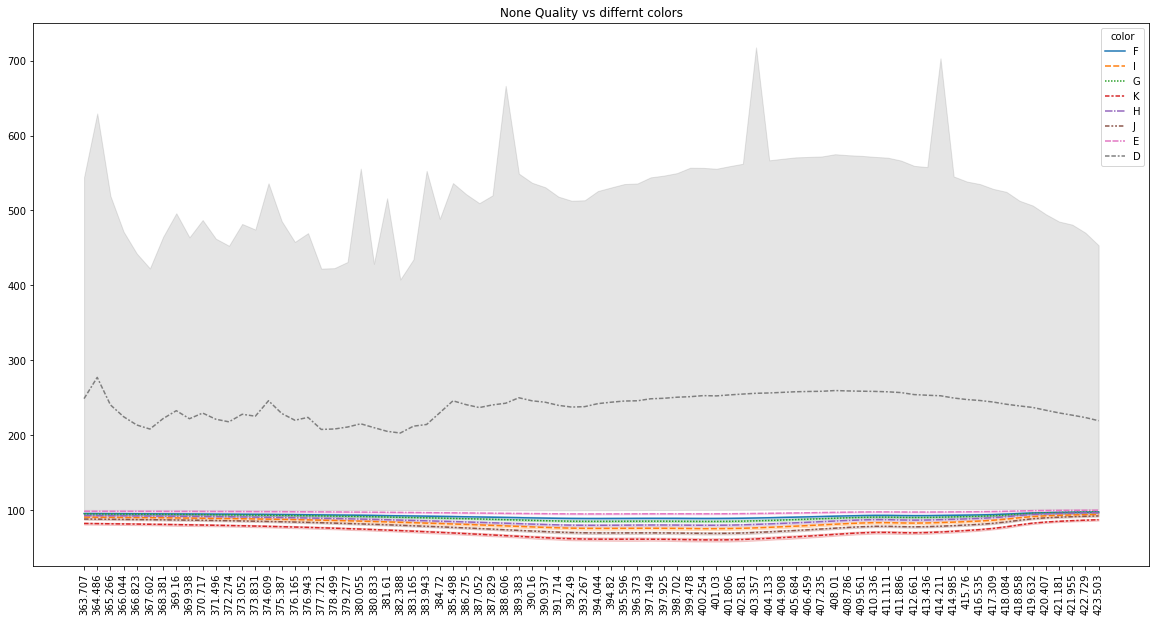

In [24]:
plt.figure(figsize=(20,10))
data1 = df_without_calb_None.set_index(["color"]).T
g1 = sns.lineplot(data=data1)
# g1.set(xticklabels=[data1.columns])
g1.set_title('None Quality vs differnt colors')
plt.xticks(rotation = 90)
plt.show()


In [25]:
plt.figure(figsize=(20,10))
g1 = sns.boxplot(data=x_norm.loc[:,'363.707':'423.503'])
plt.xticks(rotation = 90)
plt.show()


NameError: name 'x_norm' is not defined

<Figure size 1440x720 with 0 Axes>

In [ ]:
encoder = LabelEncoder()
df_without_calb_None.iloc[:,-1]= encoder.fit_transform(Y)

In [ ]:
X = df_without_calb_None.iloc[:,:-1]
Y = df_without_calb_None.iloc[:,-1]

In [ ]:
# sc = StandardScaler()
# X  = sc.fit_transform(X)

pca = PCA(n_components=5)
X = pca.fit_transform(X)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state =42, stratify = Y)

In [ ]:
print(X_train.shape,X_test.shape)

(732, 5) (183, 5)


In [ ]:
skf =StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

In [ ]:
balanced = class_weight.compute_class_weight(class_weight='balanced', classes=df_without_calb_None['color'].value_counts().keys(),y=Y)
balanced = dict(zip(df_without_calb_None['color'].value_counts().keys(),balanced))
balanced

{'G': 0.6019736842105263,
 'F': 0.7574503311258278,
 'D': 0.7998251748251748,
 'H': 1.0032894736842106,
 'E': 1.0397727272727273,
 'I': 1.1324257425742574,
 'J': 2.0795454545454546,
 'K': 2.2426470588235294}

In [1]:
et = ExtraTreesClassifier(class_weight=balanced,bootstrap=True)
# class_weight="balanced_subsample", random_state=42, n_estimators=2300,
#                           warm_start=True, max_samples=150, bootstrap=True 'max_samples':[*range(100,200,10)],'n_estimators':[*range(1500,3000,100)]
grid_values = {'max_depth':[*range(5,20)], }
et_rand = RandomizedSearchCV(et, param_distributions= grid_values, cv = skf, n_iter=20)

NameError: name 'ExtraTreesClassifier' is not defined

In [ ]:
clf = et_rand.fit(X_train, Y_train)


NameError: name 'et_rand' is not defined

In [ ]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.075590,0.004959,0.006294,0.000184,5,{'max_depth': 5},0.482993,0.482993,0.520548,0.452055,0.479452,0.483608,0.021809,15
1,0.072034,0.001065,0.006253,0.000119,6,{'max_depth': 6},0.510204,0.523810,0.527397,0.479452,0.479452,0.504063,0.020897,12
2,0.076325,0.000854,0.006446,0.000082,7,{'max_depth': 7},0.496599,0.523810,0.534247,0.452055,0.506849,0.502712,0.028496,13
3,0.080377,0.001814,0.006997,0.000393,8,{'max_depth': 8},0.517007,0.517007,0.534247,0.465753,0.500000,0.506803,0.023207,11
4,0.081007,0.002120,0.007154,0.000425,9,{'max_depth': 9},0.523810,0.517007,0.520548,0.500000,0.513699,0.515013,0.008235,8
5,0.087274,0.002514,0.007778,0.000532,10,{'max_depth': 10},0.544218,0.523810,0.472603,0.520548,0.500000,0.512236,0.024275,9
6,0.082780,0.001387,0.007156,0.000115,11,{'max_depth': 11},0.517007,0.503401,0.465753,0.486301,0.500000,0.494493,0.017376,14
7,0.084382,0.001747,0.007309,0.000200,12,{'max_depth': 12},0.551020,0.551020,0.506849,0.527397,0.534247,0.534107,0.016493,1
8,0.083519,0.000787,0.007528,0.000418,13,{'max_depth': 13},0.551020,0.530612,0.500000,0.520548,0.506849,0.521806,0.018066,5
9,0.087412,0.002745,0.007655,0.000284,14,{'max_depth': 14},0.544218,0.537415,0.493151,0.506849,0.513699,0.519066,0.019073,7


In [ ]:
X_train

array([[-1.07016268e+02, -2.69458612e+01, -8.04155297e+00,
        -1.03882237e+01, -8.95054703e-02],
       [-2.10631348e+02, -6.37982788e+00,  3.97708631e-01,
         4.81325711e-01,  6.05560129e-01],
       [-1.77631958e+02,  1.87176166e+01, -4.50591930e+00,
         4.05812043e+00, -9.89585709e-01],
       ...,
       [-1.02732474e+02,  2.56451948e+01, -8.61038959e+00,
        -1.53629297e-01,  1.86611255e+00],
       [-2.26354164e+02,  2.72635492e+00,  3.44202108e+00,
         1.72511683e+00, -2.64455244e-01],
       [-2.38455714e+02, -1.35576188e+01,  2.98751742e+00,
        -1.52463314e+00,  1.33258161e+00]])

In [ ]:
et = ExtraTreesClassifier(class_weight="balanced_subsample", random_state=42, n_estimators=2500,
                          warm_start=True, max_samples=140, bootstrap=True)

In [ ]:
lst_accu_stratified = []
lst_accu_stratified_train = []
for train_index, test_index in skf.split(X_train, Y_train):
    x_train_fold, x_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = Y_train.iloc[train_index], Y_train.iloc[test_index]
    
    pca = PCA(n_components=5)
    x_train_fold = pca.fit_transform(x_train_fold)
    x_test_fold = pca.transform(x_test_fold)
    print(x_train_fold.shape, x_test_fold.shape)
    et.fit(x_train_fold, y_train_fold)
    Y_pred = et.predict(x_test_fold)
    print(classification_report(y_test_fold, Y_pred))
    lst_accu_stratified.append(et.score(x_test_fold, y_test_fold))
    lst_accu_stratified_train.append(et.score(x_train_fold, y_train_fold))
print('List of possible accuracy:', lst_accu_stratified)
print('List of possible accuracy train:', lst_accu_stratified_train)
print('\nOverall Accuracy:', np.mean(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy train:', np.mean(lst_accu_stratified_train)*100, '%')
print('\nMinimum Accuracy:', min(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy train:', min(lst_accu_stratified_train)*100, '%')
print('\nMaximum Accuracy That can be obtained from this model is:', max(lst_accu_stratified)*100, '%')
print('\nMaximum Accuracy That can be obtained from this model is train:', max(lst_accu_stratified_train)*100, '%')

(585, 5) (147, 5)
              precision    recall  f1-score   support

           D       0.61      0.74      0.67        23
           E       0.60      0.50      0.55        18
           F       0.52      0.54      0.53        24
           G       0.57      0.67      0.62        30
           H       0.50      0.37      0.42        19
           I       0.58      0.44      0.50        16
           J       0.57      0.44      0.50         9
           K       0.55      0.75      0.63         8

    accuracy                           0.56       147
   macro avg       0.56      0.56      0.55       147
weighted avg       0.56      0.56      0.56       147

(585, 5) (147, 5)
              precision    recall  f1-score   support

           D       0.20      0.04      0.07        23
           E       0.00      0.00      0.00        18
           F       0.18      0.21      0.19        24
           G       0.25      0.77      0.38        31
           H       0.33      0.06      0.1